In [1]:
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt

## 1. Simple linear regression
$$ y = wx + b + \underbrace{\varepsilon}_{\text{random noise}} $$
Có một bộ dữ liệu gồm $n$ cặp điểm $(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})$ thỏa mãn quan hệ tuyến tính trên
$$ y^{(i)} = wx^{(i)} + b + \varepsilon^{(i)} $$
Tìm mối quan hệ $x$ và $y$ (tìm $w, b$ biểu diễn quan hệ tuyến tính trên) dựa vào bộ dữ liệu $(x^{(i)}, y^{(i)})$?

In [2]:
n = 20 # number of samples
w_true = 0.6 # slope
b_true = 2.5 # intercept
x_data = np.random.uniform(low=0.0, high=5.0, size=(n,))
epsilon = np.random.normal(scale=0.2, size=(n,)) # random noise, normal distribution N(0, 0.04)
y_data = w_true * x_data + b_true + epsilon

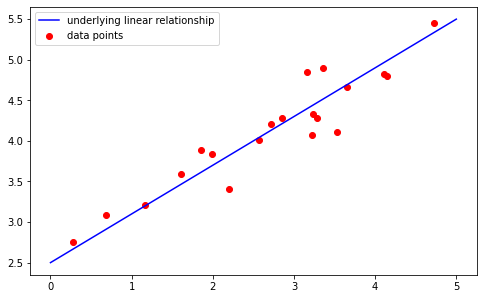

In [3]:
def plot(w_true, b_true, x_data, y_data, w_pred=None, b_pred=None):
    x = np.linspace(0.0, 5.0, 100)
    y = w_true * x + b_true
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, 'b', label='underlying linear relationship')
    if w_pred is not None and b_pred is not None:
        y_pred = w_pred * x + b_pred
        plt.plot(x, y_pred, 'g', label='predicted linear relationship')
    plt.scatter(x_data, y_data, marker='o', color='r', label='data points')
    plt.legend()
    plt.axis('scaled')
    plt.show()
plot(w_true, b_true, x_data, y_data)

**Ordinary least squares method**:
Tìm $\hat{w}, \hat{b}$ sao cho 
$$ \mathcal{L}(\hat{w}, \hat{b}) = \sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2 = (y^{(1)} - \hat{y}^{(1)})^2 + (y^{(2)} - \hat{y}^{(2)})^2 + \ldots + (y^{(n)} - \hat{y}^{(n)})^2 $$
($\hat{y}^{(i)} = \hat{w} x^{(i)} + \hat{b}$) nhỏ nhất.

In [4]:
w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)
x = torch.tensor(x_data)
y = torch.tensor(y_data)

optimizer = torch.optim.SGD([w, b], lr=0.01)

Thay vì dùng tổng loss các sample $\sum_{i=1}^n \ell^{(i)} = \sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2$ ta sẽ dùng trung bình $\dfrac{1}{n}\sum_{i=1}^n \ell^{(i)}$

In [5]:
n_iterations = 500
for i in range(n_iterations):
    y_pred = w * x + b
    loss = torch.mean((y - y_pred)**2) # trung bình squared loss các data points
    if i % 100 == 0 or i == n_iterations - 1:
        print('Iter {}: loss = {:.2f}, w = {:.2f}, b = {:.2f}'.format(i, 
                                                                      loss.detach().numpy(),
                                                                      w.detach().numpy(), 
                                                                      b.detach().numpy()))
    loss.backward() # compute gradient
    optimizer.step() # update
    optimizer.zero_grad() # reset gradient

Iter 0: loss = 17.49, w = 0.00, b = 0.00
Iter 100: loss = 0.50, w = 1.09, b = 0.94
Iter 200: loss = 0.31, w = 0.96, b = 1.35
Iter 300: loss = 0.20, w = 0.86, b = 1.66
Iter 400: loss = 0.14, w = 0.78, b = 1.90
Iter 499: loss = 0.10, w = 0.73, b = 2.08


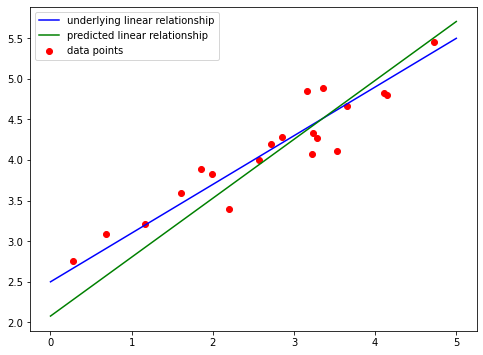

In [6]:
plot(w_true, b_true, x_data, y_data, w.detach().numpy(), b.detach().numpy())

## 2. Multivariate linear regression
Có $p$ biến độc lập $\mathbf{x} = [x_1, x_2, \ldots, x_p]$ và $m$ biến phụ thuộc $\mathbf{y} = [y_1, y_2, \ldots, y_m]$
\begin{align}
y_1 &= w_{11} x_1 + w_{21} x_2 + \ldots + w_{p1} x_p + b_1 + \varepsilon_1 \\
y_2 &= w_{12} x_1 + w_{22} x_2 + \ldots + w_{p2} x_p + b_2 + \varepsilon_2 \\
\vdots \\
y_m &= w_{1m} x_1 + w_{2m} x_2 + \ldots + w_{pm} x_p + b_m + \varepsilon_m
\end{align}
Viết gọn dưới dạng ma trận
$$ \mathbf{y} = \mathbf{x}\mathbf{W} + \mathbf{b} + \mathbf{\varepsilon} $$
với
$\mathbf{W} = \begin{bmatrix} w_{11} & \ldots & w_{1m} \\ \vdots & \ddots & \vdots \\ w_{p1} & \ldots & w_{pm} \end{bmatrix}, \mathbf{b} = [b_1, b_2, \ldots, b_m], \mathbf{\varepsilon} = [\varepsilon_1, \varepsilon_2, \ldots, \varepsilon_m]$

Dữ liệu $n$ samples $(\mathbf{x}^{(1)}, \mathbf{y}^{(1)}), (\mathbf{x}^{(2)}, \mathbf{y}^{(2)}), \ldots, (\mathbf{x}^{(n)}, \mathbf{y}^{(n)})$ thỏa mãn quan hệ tuyến tính trên
$$ \mathbf{y}^{(i)} = \mathbf{x}^{(i)}\mathbf{W} + \mathbf{b} + \mathbf{\varepsilon}^{(i)} $$

Loss function: mean squared error
\begin{align}
\mathcal{L}(\hat{\mathbf{W}}, \hat{\mathbf{b}}) &= \dfrac{1}{n} \sum_{i=1}^n \ell^{(i)} \\
&= \dfrac{1}{n} \sum_{i=1}^n \dfrac{1}{m} \lVert \mathbf{y}^{(i)} - \hat{\mathbf{y}}^{(i)} \rVert^2 \\
&= \dfrac{1}{nm} \sum_{i=1}^n \lVert \mathbf{y}^{(i)} - (\mathbf{x}^{(i)} \hat{\mathbf{W}} + \mathbf{b}) \rVert^2
\end{align}
(Kí hiệu $\lVert \cdot \rVert$ chỉ độ dài vector, $\lVert \mathbf{y} \rVert^2 = y_1^2 + y_2^2 + \ldots + y_m^2$)

In [7]:
p = 30 # in features
m = 20 # out features
n = 10000 # number of samples
W_true = np.random.normal(size=(p, m)) # weights
b_true = np.random.normal(size=(m,)) # biases
x_data = np.random.uniform(low=0.0, high=5.0, size=(n, p))
epsilon = np.random.normal(scale=0.2, size=(n, m)) # random noise
y_data = np.matmul(x_data, W_true) + b_true + epsilon

* Mỗi khi thực hiện một iteration của gradient descent phải tính gradient loss function của toàn bộ $n$ data points. Khi $n$ lớn việc tính toán trở nên tốn kém, không khả thi.
* **Mini-batch gradient descent**: chia bộ dữ liệu thành từng batch nhỏ, dữ liệu trong mỗi batch được chọn ngẫu nhiên (bằng cách shuffle dataset trước khi chia thành từng batch). Mỗi vòng lặp chỉ đưa vào một batch thay vì toàn bộ dataset.
* Khi toàn bộ dữ liệu đi qua thuật toán $\rightarrow$ gọi là một epoch. Trong cùng một epoch nếu:
 * batch lớn $\rightarrow$ số iteration nhỏ nên thực hiện được ít lần update hơn, tuy nhiên gradient loss của batch "chính xác" hơn (xấp xỉ gradient loss toàn bộ dataset hơn)
 * batch nhỏ $\rightarrow$ số iteration lớn nên thực hiện được nhiều lần update hơn, tuy nhiên gradient loss của batch không "chính xác" bằng

### `torch.utils.data.Dataset` và `torch.utils.data.DataLoader`
* `torch.utils.data.Dataset`: abstract class biểu diễn dataset. Có thể tạo custom dataset bằng cách inherit `torch.utils.data.Dataset` và override các method sau
 * `__len__`: `len(dataset)` sẽ trả về số lượng dữ liệu trong dataset
 * `__getitem__`: hỗ trợ index dataset (`dataset[i]` sẽ trả về sample thứ `i` trong dataset)
* `torch.utils.data.DataLoader`: hỗ trợ chia dataset thành các batch, shuffle dữ liệu, convert numpy array thành torch tensor, v.v.

Tham khảo 
* https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
* https://pytorch.org/docs/stable/data.html

In [8]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, x_data, y_data):
        assert len(x_data) == len(y_data)
        self.x = x_data
        self.y = y_data
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {'x': self.x[idx], 'y': self.y[idx]}

Mỗi sample là một dictionary, `'x'` là numpy array shape `(p, )`, `'y'` là numpy array shape `(m, )`

In [9]:
dataset = CustomDataset(x_data, y_data)
dataset[0]

{'x': array([1.80100572, 1.90588146, 3.65711585, 2.6189017 , 3.23929028,
        4.83264161, 2.28703799, 3.95808278, 3.06646572, 3.64958085,
        4.35217672, 0.09692763, 0.33863865, 2.02107488, 0.67800717,
        2.76597609, 3.01778127, 2.26993891, 1.7229185 , 0.79402753,
        4.93673191, 1.81282199, 3.96765244, 3.01826248, 4.34165619,
        0.38336534, 0.74361258, 2.99632794, 0.39751456, 0.13685346]),
 'y': array([  8.12545623, -23.31000183, -12.16757218,   8.15288007,
         -7.96079236,  -7.0971158 ,   8.4945458 ,  18.99656045,
         -1.29009854,   1.78626507, -17.80962848,  12.10954606,
         21.6460879 , -14.12067049,  13.27164983,   2.02509503,
         16.15458723,  10.23012127,  -4.49610598, -15.54321327])}

Shuffle dataset và chia thành các batch với `DataLoader`
* `batch_size`: kích thước mỗi batch
* `collate_fn`: chỉ ra cách gộp list các sample trong dataset thành một batch như thế nào. `collate_fn` mặc định của pytorch sẽ stack các numpy array trong từng sample vào với nhau (thêm axis batch size ở đầu tiên) và convert sang torch tensor.

$\rightarrow$ mỗi batch của `DataLoader` là một dictionary:
* `'x'` là một `torch.Tensor` dtype `torch.float64` shape `(batch_size, p)`
* `'y'` là một `torch.Tensor` dtype `torch.float64` shape `(batch_size, m)`

In [10]:
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=None)
batch = next(iter(loader))
batch_dtype = {k: v.dtype for k, v in batch.items()}
batch_shape = {k: v.shape for k, v in batch.items()}
print(f'batch dtype: {batch_dtype}')
print(f'batch shape: {batch_shape}')

batch dtype: {'x': torch.float64, 'y': torch.float64}
batch shape: {'x': torch.Size([32, 30]), 'y': torch.Size([32, 20])}


Có thể tự implement custom `collate_fn` bắt chước `collate_fn` mặc định của pytorch

In [11]:
def custom_collate_fn(batch):
    """
    Gộp list các sample thành một batch
    Args:
        batch: list các sample, mỗi sample là một dictionary
         'x': np.array shape (p, )
         'y': np.array shape (m, )
    Returns:
        dictionary
         'x': torch.Tensor shape (batch_size, p)
         'y': torch.Tensor shape (batch_size, m)
    """
    return {k: torch.as_tensor(np.stack([sample[k] for sample in batch], axis=0)) for k in batch[0].keys()}

In [12]:
custom_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)
batch = next(iter(custom_loader))
batch_dtype = {k: v.dtype for k, v in batch.items()}
batch_shape = {k: v.shape for k, v in batch.items()}
print(f'batch dtype: {batch_dtype}')
print(f'batch shape: {batch_shape}')

batch dtype: {'x': torch.float64, 'y': torch.float64}
batch shape: {'x': torch.Size([32, 30]), 'y': torch.Size([32, 20])}


### Tạo custom model với `torch.nn.Module`
Có thể tự tạo custom model/layer bằng cách subclass `torch.nn.Module` và implement lại `__init__()` và `forward()`:
* `__init__()`: định nghĩa các parameter của model
 * cần gọi `Module.__init__()` trước khi assign parameter
 * sử dụng `torch.nn.Parameter` để assign parameter cho model. `Parameter` là subclass của `Tensor`, mặc định `requires_grad=True` và được tự động register vào danh sách parameter của model (gọi `model.parameters()` hoặc `model.named_parameters()` để trả về danh sách các parameter của model)
* `forward()`: nhận input tensor và trả về output tensor

Tham khảo
* https://pytorch.org/docs/master/notes/extending.html#adding-a-module
* https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-custom-nn-modules
* https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html
* https://pytorch.org/docs/stable/generated/torch.nn.Module.html
* https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html

In [13]:
class CustomLinear(torch.nn.Module):
    def __init__(self, in_features, out_features):
        super(CustomLinear, self).__init__()
        self.W = torch.nn.Parameter(torch.zeros(in_features, out_features)) # weights
        self.b = torch.nn.Parameter(torch.zeros(out_features)) # biases
    
    def forward(self, x):
        # x shape (batch_size, in_features)
        return torch.matmul(x, self.W) + self.b # (batch_size, out_features)

In [14]:
model = CustomLinear(in_features=p, out_features=m)

Có thể thấy các tham số `W` và `b` đã xuất hiện trong `model.parameters()`/`model.named_paramters()`

In [15]:
for param in model.named_parameters():
    print(param)

('W', Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

Nếu chỉ sử dụng `torch.tensor(..., requires_grad=True)` thay vì `torch.nn.Parameter` thì sẽ không được register vào danh sách parameter của model và do đó sẽ không xuất hiện trong `model.parameters()`

In [16]:
class CustomLinear2(torch.nn.Module):
    def __init__(self, in_features, out_features):
        super(CustomLinear2, self).__init__()
        self.W = torch.zeros(in_features, out_features, requires_grad=True) # weights
        self.b = torch.zeros(out_features, requires_grad=True) # biases
    
    def forward(self, x):
        # x shape (batch_size, in_features)
        return torch.matmul(x, self.W) + self.b # (batch_size, out_features)
    
model2 = CustomLinear2(in_features=p, out_features=m)
for param in model2.named_parameters():
    print(param)

* Để forward dữ liệu qua model thì ta call trực tiếp model `output = model(x)` thay vì call `output = model.forward(x)`:

In [17]:
with torch.no_grad():
    output = model(torch.as_tensor(x_data).float()) # convert float64 -> float32 với .float()
    print(output.shape)

torch.Size([10000, 20])


Note: lúc tạo `W` và `b` đều có `dtype` là `float32`. Mà `torch.as_tensor(x_data)` có `dtype` cùng với `x_data` (ở đây là `float64`) nên cần convert sang `float32` bằng `.float()` cùng `dtype` với `W` và `b`.

* `Module` cũng có thể chứa các `Module` con khác (bằng cách assign submodule như một attribute thông thường). Dưới đây là ví dụ một feedforward neural network đơn giản (không có activation function) gồm 1 input layer, 1 hidden layer và 1 output layer:

In [18]:
class CustomNeuralNetwork(torch.nn.Module):
    def __init__(self, in_features, hidden_units, out_features):
        super(CustomNeuralNetwork, self).__init__()
        self.fc1 = CustomLinear(in_features, hidden_units)
        self.fc2 = CustomLinear(hidden_units, out_features)
    
    def forward(self, x):
        # x shape (batch_size, in_features)
        x = self.fc1(x) # (batch_size, hidden_units)
        x = self.fc2(x) # (batch_size, out_features)
        return x

Có thể thấy các parameter của các submodule cũng được register vào module chính

In [19]:
neuralnet = CustomNeuralNetwork(in_features=5, hidden_units=4, out_features=3)
for param in neuralnet.named_parameters():
    print(param)

('fc1.W', Parameter containing:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], requires_grad=True))
('fc1.b', Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True))
('fc2.W', Parameter containing:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], requires_grad=True))
('fc2.b', Parameter containing:
tensor([0., 0., 0.], requires_grad=True))


* **Custom loss function**: Có thể implement custom loss function như một method bình thường hoặc subclass `torch.nn.Module` tương tự như tạo custom model

Mean squared error loss
\begin{align}
\mathcal{L} &= \dfrac{1}{n} \sum_{i=1}^n \dfrac{1}{m} \lVert \mathbf{y}^{(i)} - \hat{\mathbf{y}}^{(i)} \rVert^2 \\
&= \dfrac{1}{nm} \sum_{i=1}^n \sum_{j=1}^m (y_j^{(i)} - \hat{y}_j^{(i)})^2 \\
\end{align}

In [20]:
class CustomMSELoss(torch.nn.Module):
    def __init__(self):
        super(CustomMSELoss, self).__init__()
    
    def forward(self, pred, target):
        """
        Args:
            pred - model output, shape (batch_size, m)
            target - label, shape (batch_size, m)
        Returns:
            mse loss - scalar
        """
        return torch.mean((target - pred)**2)

In [21]:
mse_loss = CustomMSELoss()

* Training loop

Tạo optimizer: lúc này các biến cần tối ưu là `W` và `b` đã được register vào danh sách tham số của model nên ta chỉ cần truyền `model.parameters()` cho optimizer

In [22]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer.zero_grad()

Train toàn bộ dữ liệu 10 lần, mỗi lần toàn bộ dữ liệu được đưa qua thuật toán gọi là 1 epoch

In [23]:
n_epochs = 10
for epoch in range(n_epochs):
    print(f'Epoch {epoch}')
    n_steps = len(loader)
    for step, batch in enumerate(loader):
        x, y = batch['x'].float(), batch['y'].float() # .float() để convert float64 -> float32
        output = model(x) # forward
        loss = mse_loss(output, y) # compute loss
        print(' Iter {}/{}: loss = {:.2f}'.format(step, n_steps - 1, loss.detach().item()), end='\r')
        
        loss.backward() # compute gradient of loss w.r.t model parameters (backpropagation)
        optimizer.step() # update model parameters
        optimizer.zero_grad() # reset gradient
    print('\n')

Epoch 0
 Iter 312/312: loss = 17.38

Epoch 1
 Iter 312/312: loss = 4.298

Epoch 2
 Iter 312/312: loss = 1.11

Epoch 3
 Iter 312/312: loss = 0.37

Epoch 4
 Iter 312/312: loss = 0.13

Epoch 5
 Iter 312/312: loss = 0.07

Epoch 6
 Iter 312/312: loss = 0.06

Epoch 7
 Iter 312/312: loss = 0.05

Epoch 8
 Iter 312/312: loss = 0.04

Epoch 9
 Iter 312/312: loss = 0.05



###  Toàn bộ phần trên trong một cell

In [24]:
############################
### Generate dữ liệu mẫu ###
############################
p = 30 # in features
m = 20 # out features
n = 10000 # number of samples
W_true = np.random.normal(size=(p, m)) # weights
b_true = np.random.normal(size=(m,)) # biases
x_data = np.random.uniform(low=0.0, high=5.0, size=(n, p))
epsilon = np.random.normal(scale=0.2, size=(n, m)) # random noise
y_data = np.matmul(x_data, W_true) + b_true + epsilon

######################################
### Chuẩn bị dataset và dataloader ###
######################################
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, x_data, y_data):
        assert len(x_data) == len(y_data)
        self.x = x_data
        self.y = y_data
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {'x': self.x[idx], 'y': self.y[idx]}
    
dataset = CustomDataset(x_data, y_data)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=None)

##################################
### Tạo model và loss function ###
##################################
class CustomLinear(torch.nn.Module):
    def __init__(self, in_features, out_features):
        super(CustomLinear, self).__init__()
        self.W = torch.nn.Parameter(torch.zeros(in_features, out_features)) # weights
        self.b = torch.nn.Parameter(torch.zeros(out_features)) # biases
    
    def forward(self, x):
        # x shape (batch_size, in_features)
        return torch.matmul(x, self.W) + self.b # (batch_size, out_features)
    
class CustomMSELoss(torch.nn.Module):
    def __init__(self):
        super(CustomMSELoss, self).__init__()
    
    def forward(self, pred, target):
        """
        Args:
            pred - model output, shape (batch_size, m)
            target - label, shape (batch_size, m)
        Returns:
            mse loss - scalar
        """
        return torch.mean((target - pred)**2)
    
model = CustomLinear(in_features=p, out_features=m)
mse_loss = CustomMSELoss()

#####################
### Training loop ###
#####################
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer.zero_grad()
n_epochs = 10
for epoch in range(n_epochs):
    print(f'Epoch {epoch}')
    n_steps = len(loader)
    for step, batch in enumerate(loader):
        x, y = batch['x'].float(), batch['y'].float() # .float() để convert float64 -> float32
        output = model(x) # forward
        loss = mse_loss(output, y) # compute loss
        print(' Iter {}/{}: loss = {:.2f}'.format(step, n_steps - 1, loss.detach().item()), end='\r')
        
        loss.backward() # compute gradient of loss w.r.t model parameters (backpropagation)
        optimizer.step() # update model parameters
        optimizer.zero_grad() # reset gradient
    print('\n')

Epoch 0
 Iter 312/312: loss = 19.09

Epoch 1
 Iter 312/312: loss = 4.183

Epoch 2
 Iter 312/312: loss = 1.68

Epoch 3
 Iter 312/312: loss = 0.47

Epoch 4
 Iter 312/312: loss = 0.15

Epoch 5
 Iter 312/312: loss = 0.09

Epoch 6
 Iter 312/312: loss = 0.05

Epoch 7
 Iter 312/312: loss = 0.05

Epoch 8
 Iter 312/312: loss = 0.05

Epoch 9
 Iter 312/312: loss = 0.05

